In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [48]:
surveyData = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv")
print(surveyData.shape)
surveyData = surveyData.drop(['#', '<strong>Do you have previous employers?</strong>', '<strong>Are you self-employed?</strong>', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'], axis = 1)
print(surveyData.shape)

all_row = surveyData.dropna(axis=0)
print(all_row.shape)

all_col = surveyData.dropna(axis=1)
print(all_col.shape)

surveyData.head(100)

(756, 123)
(756, 117)
(0, 117)
(756, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 117 entries, How many employees does your company or organization have? to What US state or territory do you <strong>work</strong> in?
dtypes: float64(36), int64(2), object(79)
memory usage: 691.1+ KB


Getting rid of questions that no one answered...

In [39]:
surveyData_yes_mh = surveyData[surveyData['Do you currently have a mental health disorder?'] == 'Yes']
print(surveyData_yes_mh.shape)

surveyData_no_mh = surveyData[surveyData['Do you currently have a mental health disorder?'] == 'No']
print(surveyData_no_mh.shape)

all_row_mh = surveyData_yes_mh.dropna(axis=0)
print(all_row_mh.shape)

all_col_mh = surveyData_yes_mh.dropna(axis=1)
print(all_col_mh.shape)

all_row_no = surveyData_no_mh.dropna(axis=0)
print(all_row_no.shape)

all_col_no = surveyData_no_mh.dropna(axis=1)
print(all_col_no.shape)

(324, 117)
(222, 117)
(0, 117)
(324, 9)
(0, 117)
(222, 18)


(756, 57)


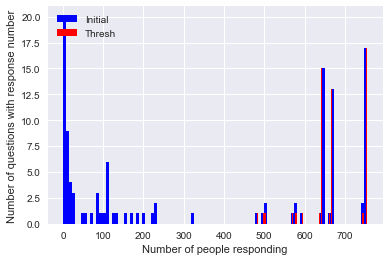

In [25]:
surveyData_resp_counts = surveyData.count(axis = 0).sort_values()
surveyData_resp_counts.hist(bins = 100, color="blue", label = 'Initial')
plt.xlabel('Number of people responding')
plt.ylabel('Number of questions with response number')
plt.legend(loc='upper left')

surveyData_resp_thresh = surveyData.dropna(axis=1, thresh=400)
print(surveyData_resp_thresh.shape)

surveyData_resp_thresh_counts = surveyData_resp_thresh.count(axis = 0).sort_values()
surveyData_resp_thresh_counts.hist(bins = 100, color="red", label = 'Thresh')
plt.legend(loc='upper left')

In [5]:
print(surveyData_resp_counts)

Addictive Disorder                                                                                                                                                                                                                           0
Other                                                                                                                                                                                                                                        0
Substance Use Disorder                                                                                                                                                                                                                       0
Dissociative Disorder                                                                                                                                                                                                                        0
Stress Response Syndromes                   

(257, 117)


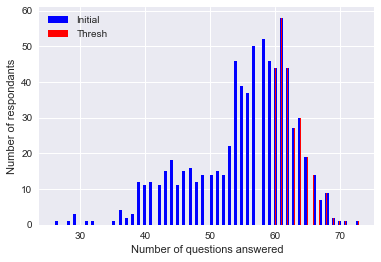

In [40]:
surveyData_quest_counts = surveyData.count(axis = 1).sort_values()
surveyData_quest_counts.hist(bins = 100, color="blue", label = 'Initial')
plt.xlabel('Number of questions answered')
plt.ylabel('Number of respondants')
plt.legend(loc='upper left')

surveyData_quest_thresh = surveyData.dropna(axis=0, thresh=60)
print(surveyData_quest_thresh.shape)

surveyData_quest_thresh_counts = surveyData_quest_thresh.count(axis = 1).sort_values()
surveyData_quest_thresh_counts.hist(bins = 100, color="red", label = 'Thresh')
plt.legend(loc='upper left')

In [7]:
surveyData_quest_counts

188    26
186    28
168    29
161    29
201    29
95     31
341    32
753    35
21     36
620    36
89     36
97     36
400    37
194    37
418    38
285    38
133    38
580    39
626    39
354    39
424    39
77     39
165    39
106    39
586    39
625    39
217    39
12     39
719    39
65     40
628    40
159    40
300    40
38     40
403    40
146    40
308    40
442    40
450    40
242    40
132    41
434    41
105    41
137    41
136    41
755    41
93     41
647    41
19     41
189    41
660    41
342    41
414    42
363    42
573    42
208    42
288    42
522    42
700    42
138    42
600    42
82     42
172    42
652    43
235    43
445    43
174    43
175    43
536    43
270    43
621    43
674    43
33     43
375    43
380    43
708    43
69     43
596    43
365    44
284    44
373    44
427    44
389    44
109    44
281    44
204    44
429    44
245    44
327    44
437    44
638    44
683    44
606    44
592    44
649    44
535    44
417    45
568    45
426    45
170    45


In [55]:
thresh_resp = surveyData_resp_thresh.dropna(axis=0)
print(thresh_resp.shape)

thresh_quest = surveyData_quest_thresh.dropna(axis=1)
print(thresh_quest.shape)

thresh_quest = thresh_quest.reset_index(drop=True)
thresh_quest.head()

(213, 57)
(257, 31)


,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>,Did you ever discuss your mental health with a previous coworker(s)?,"Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?",Do you currently have a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,Do you have a family history of mental illness?,"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>","If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>",How willing would you be to share with friends and family that you have a mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,Are you openly identified at work as a person with a mental health issue?,"If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>,<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>,"Overall, how well do you think the tech industry supports employees with mental health issues?",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em> and only with your permission.),What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What country do you <strong>work</strong> in?
0,1.0,Some did,N/A (was not aware),None did,None did,I don't know,Physical health,"No, none of my previous supervisors",0.0,At some of my previous employers,1.0,8.0,0.0,Yes,1,Yes,Sometimes,Sometimes,5,Maybe,No,1.0,5.0,"Yes, I experienced","Yes, I experienced",1.0,1.0,36.0,male,United States of America,United States of America
1,1.0,Some did,I was aware of some,None did,None did,"Yes, always",Same level of comfort for each,Some of my previous supervisors,1.0,At some of my previous employers,1.0,10.0,10.0,Yes,1,Yes,Rarely,Often,8,No,No,1.0,5.0,No,"Yes, I observed",2.0,1.0,36.0,F,United States of America,United States of America
2,1.0,Some did,I was aware of some,None did,None did,I don't know,Physical health,"No, none of my previous supervisors",0.0,"No, at none of my previous employers",0.0,9.0,1.0,Yes,1,Yes,Often,Sometimes,2,No,No,0.0,2.0,"Yes, I experienced",No,1.0,0.0,40.0,M,United States of America,United States of America
3,1.0,Some did,I was aware of some

In [66]:
surveyData_cat = surveyData.select_dtypes(include=['object']).copy()
surveyData_cat['Do you currently have a mental health disorder?'].astype('category').cat.codes
surveyData_cat.head()

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Describe the conversation your coworker had with you about their mental health (please do not use names).,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>,Describe the conversation you had with your previous coworkers about your mental health including their reactions.,Describe the conversation your coworker had with you about their mental health (please do not use names)..1,Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Post-traumatic Stress Disorder,Stre

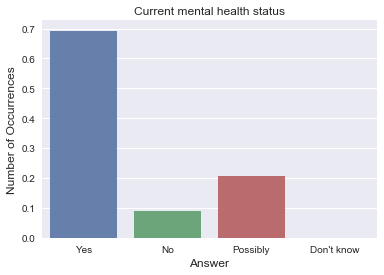

In [44]:
curr_mh_small = thresh_quest['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.set(style="darkgrid")
sns.barplot(curr_mh_small.index, curr_mh_small.values, alpha=0.9, order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Current mental health status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.show()

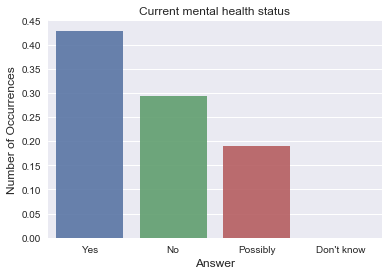

In [26]:
curr_mh_big = surveyData['Do you currently have a mental health disorder?'].value_counts(normalize=True)
#sns.set(style="darkgrid")
sns.barplot(curr_mh_big.index, curr_mh_big.values, alpha=0.9, order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Current mental health status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.show()

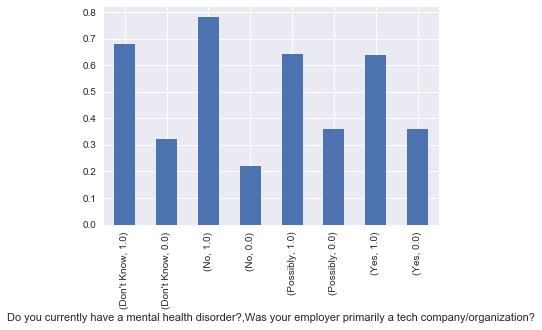

In [47]:
surveyData.groupby('Do you currently have a mental health disorder?')['Was your employer primarily a tech company/organization?'].value_counts(normalize=True).plot.bar()

Text(0,0.5,'Willingness')

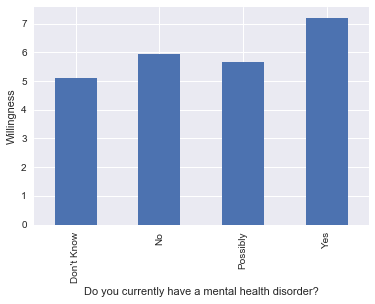

In [56]:
surveyData.groupby('Do you currently have a mental health disorder?')['How willing would you be to share with friends and family that you have a mental illness?'].mean().plot(kind='bar')
plt.ylabel("Willingness")

In [ ]:
data_dummies = pd.get_dummies(answer_all)
data_dummies.head()

In [89]:
surveyData_cont = surveyData.select_dtypes(include=['float', 'int']).copy()
surveyData_cont['How many employees does your company or organization have?'] = surveyData_cat['How many employees does your company or organization have?']
org_size = surveyData_cont['How many employees does your company or organization have?']
org_size

0             100-500
1             100-500
2                6-25
3      More than 1000
4                 NaN
5             100-500
6                6-25
7              26-100
8             100-500
9                 NaN
10            100-500
11            100-500
12     More than 1000
13     More than 1000
14             26-100
15            100-500
16             26-100
17                NaN
18               6-25
19     More than 1000
20               6-25
21            100-500
22             26-100
23                1-5
24            100-500
25               6-25
26     More than 1000
27            100-500
28            100-500
29                NaN
30            100-500
31            100-500
32            100-500
33                NaN
34     More than 1000
35               6-25
36             26-100
37            100-500
38                NaN
39            100-500
40            100-500
41            100-500
42           500-1000
43            100-500
44           500-1000
45     Mor

In [97]:
org_size_nona = org_size.dropna()
print(len(org_size_nona))
sizes = []
for row in org_size_nona:
    if row == '6-25':
        size = 15
        sizes.append(size)
    if row == '100-500':
        size = 250
        sizes.append(size)
    if row == 'NaN':
        print(row)
        size = None
        sizes.append(size)
    if row == '26-100':
        size = 75
        sizes.append(size)
    if row == '500-1000':
        size = 750
        sizes.append(size)
    if row == 'More than 1000':
        size = 1000
        sizes.append(size)
    if row == '1-5':
        size = 3
        sizes.append(size)
        
len(sizes)


643


643

In [ ]:
result = pd.concat([df1, df4], axis=1, sort=False)

In [73]:

dummy_df_org['small'], dummy_df_org['big'] = zip(*surveyData_cont['How many employees does your company or organization have?'].map(lambda x: x.split('-')))

#dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

surveyData_cont.head()

AttributeError: 'float' object has no attribute 'split'